In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from IPython.display import Image

In [6]:
path = r"C:\Users\Sasa\Downloads\monroe_twp_nj.csv"

In [7]:
pd.read_csv(path)

,Unnamed: 0,Area,Price,Bedrooms,Years
0,0,2600,550000,3.0,20
1,1,3000,565000,4.0,15
2,2,3200,610000,NaN,18
3,3,3600,595000,3.0,30
4,4,4000,760000,5.0,8
5,5,4100,810000,6.0,8


In [8]:
df = pd.read_csv(path)
df

,Unnamed: 0,Area,Price,Bedrooms,Years
0,0,2600,550000,3.0,20
1,1,3000,565000,4.0,15
2,2,3200,610000,NaN,18
3,3,3600,595000,3.0,30
4,4,4000,760000,5.0,8
5,5,4100,810000,6.0,8


In [16]:
#remove column zero, axis= '0' means index '1' means columns
#if you want to get rid of columns use axis=1
#inplace=True is permanent
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [14]:
#use avg for bedrooms
df["Bedrooms"]

0    3.0
1    4.0
2    NaN
3    3.0
4    5.0
5    6.0
Name: Bedrooms, dtype: float64

In [18]:
#Used to detect missing value, returns boolean. If there is at least one missing value returns true
df.isna().any()

Area        False
Price       False
Bedrooms     True
Years       False
dtype: bool

In [19]:
#returns the number of missing values, gives you a count
df.isna().sum()

Area        0
Price       0
Bedrooms    1
Years       0
dtype: int64

In [20]:
df["Bedrooms"].mean()

4.2

In [21]:
df.fillna(df["Bedrooms"].mean(), inplace=True)

In [22]:
df

,Area,Price,Bedrooms,Years
0,2600,550000,3.0,20
1,3000,565000,4.0,15
2,3200,610000,4.2,18
3,3600,595000,3.0,30
4,4000,760000,5.0,8
5,4100,810000,6.0,8


In [ ]:
#find price of home with 3000 sq ft., 3 bd, 40 yrs old
# 2500 sq ft, bd, y/o

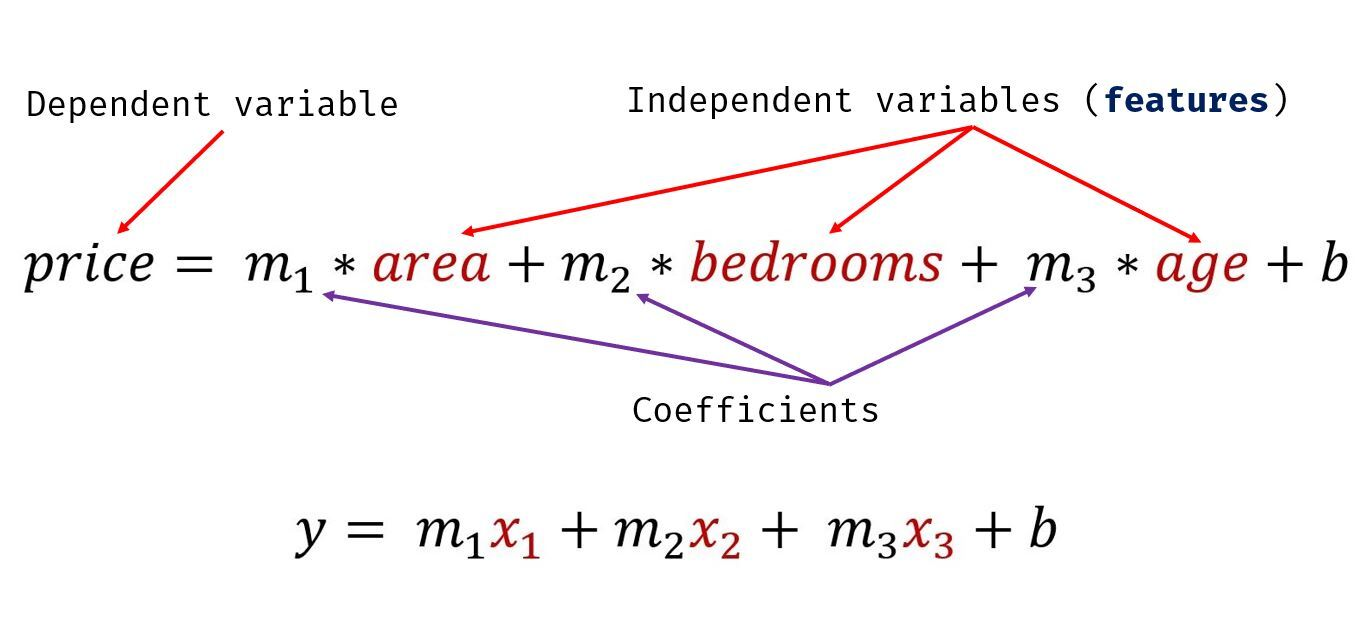

In [29]:
Image(r"C:\Users\Sasa\Downloads\9.1.jpg")

In [40]:
X = df[["Area", "Bedrooms", "Years"]]

In [41]:
y = df.Price

In [42]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: Price, dtype: int64

In [43]:
reg = linear_model.LinearRegression()

In [44]:
reg.fit(X,y)

LinearRegression()

In [45]:
reg.coef_ 

array([  116.66950551, 18756.28806982, -3675.75111708])

In [37]:
reg.intercept_

76692.3818707813

In [46]:
m1 = 116.66950551
m2 = 18756.28806982
m3 = -3675.75111708

In [48]:
(m1 * 3000) + (m2 * 3) + (m3 * 40) + reg.intercept_

490833.3424503518

In [49]:
reg.predict([[3000, 3, 40], [2500, 4, 5]])

array([490833.34243748, 579906.16685223])

In [51]:
#same
(m1 *2500)+(m2 *4) +(m3 *5)+ reg.intercept_

579906.1668629718